In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta, date, time
import pickle

# Import

Import LA Metro Bike 2018 Dataset

In [2]:
df_LA = pd.read_csv('../data/LosAngeles/la_2018.csv')  

#drop duplicates and keep the last
df_LA = df_LA.drop_duplicates(keep='last')

Get complete LA Metro Bike 2018 Dataset from the Webstie

In [3]:
df_2018_q1 = pd.read_csv('../data/metro-bike-share-trips-2018-q1.csv')
df_2018_q2 = pd.read_csv('../data/metro-bike-share-trips-2018-q2.csv')
df_2018_q3 = pd.read_csv('../data/metro-bike-share-trips-2018-q3.csv')
df_2018_q4 = pd.read_csv('../data/metro-bike-share-trips-2018-q4.csv')
df_station_table = pd.read_csv('../data/metro-bike-share-stations-2021-10-01.csv')

#put together
df_2018_complete = df_2018_q1.append(df_2018_q2, ignore_index=False)
df_2018_complete = df_2018_complete.append(df_2018_q3, ignore_index=False)
df_2018_complete = df_2018_complete.append(df_2018_q4, ignore_index=False)

#df_2018_complete

# Inspection

...

In [4]:
df_LA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311852 entries, 0 to 311893
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   start_time          311852 non-null  object
 1   end_time            311852 non-null  object
 2   start_station_id    311852 non-null  int64 
 3   end_station_id      311852 non-null  int64 
 4   bike_id             311852 non-null  int64 
 5   user_type           311852 non-null  object
 6   start_station_name  311852 non-null  object
 7   end_station_name    311852 non-null  object
dtypes: int64(3), object(5)
memory usage: 21.4+ MB


...

In [5]:
df_LA.describe()

,start_station_id,end_station_id,bike_id
count,311852.000000,311852.000000,311852.000000
mean,3407.505493,3402.357272,8308.963425
std,538.636699,537.618429,2918.539564
min,3000.000000,3000.000000,4727.000000
25%,3030.000000,3030.000000,6084.000000
50%,3063.000000,3058.000000,6480.000000
75%,4163.000000,4162.000000,12097.000000
max,4276.000000,4276.000000,15075.000000


# Transformations & Additions

...

In [6]:
#transform columns start_time and end_time into datetime
df_LA['start_time'] = pd.to_datetime(df_LA['start_time'])
df_LA['end_time'] = pd.to_datetime(df_LA['end_time'])

...

In [7]:
# calculate the total trip duration in hours
df_LA['trip_duration'] = df_LA['end_time'] - df_LA['start_time']

**Complete df_station_table with lat and lon for each station**

In [8]:
#use lat&lon from df_2018_complete
df_complete = df_2018_complete

#group by start station and calculate the mean (because of slightly different values in the complete datase)
df_start_geo = df_complete.groupby('start_station').mean()
df_start_geo = df_start_geo[['start_lat', 'start_lon']]
df_start_geo = df_start_geo.reset_index().rename(columns={'start_station': 'key'}).set_index('key')
df_start_geo

df_geo = df_start_geo

df_stations_complete = df_geo.merge(df_station_table, how='left', left_on='key', right_on='3000')
df_stations_complete = df_stations_complete.rename(columns={'3000': 'station_id', 'Virtual Station': 'station_name', 'start_lat': 'lat', 'start_lon': 'lon'}).dropna()
df_stations_complete

,lat,lon,station_id,station_name,7/7/2016,N/A,Active
1,34.048500,-118.258537,3005.0,7th & Flower,7/7/2016,DTLA,Active
2,34.045540,-118.256668,3006.0,Olive & 8th,7/7/2016,DTLA,Active
3,34.050480,-118.254593,3007.0,5th & Grand,7/7/2016,DTLA,Active
4,34.046612,-118.262733,3008.0,Figueroa & 9th,7/7/2016,DTLA,Active
5,34.037048,-118.254868,3010.0,11th & Maple,7/7/2016,DTLA,Active
...,...,...,...,...,...,...,...
126,34.028679,-118.284111,4254.0,Hoover & 29th,7/9/2018,DTLA,Active
128,34.027618,-118.280678,4267.0,28th & University,11/29/2018,DTLA,Active
129,34.025860,-118.284103,4273.0,Hoover & 32nd,8/23/2018,DTLA,Active
130,34.012520,-118.285896,4275.0,Expo Park/LAFC,10/8/2018,DTLA,Active


...

In [9]:
#ensure there is only one station id for each station name
df_id = df_LA.sort_values(by=['bike_id','start_time'], ascending=True)

df_unique_id = df_id.groupby('start_station_id')['start_station_name'].nunique().reset_index()
df_unique_name = df_id.groupby('start_station_name')['start_station_id'].nunique().reset_index()

print(df_unique_id)
print(df_unique_name)


print(df_unique_id.start_station_name.max())
print(df_unique_name.start_station_id.max())

     start_station_id  start_station_name
0                3000                   1
1                3005                   1
2                3006                   1
3                3007                   1
4                3008                   1
..                ...                 ...
127              4266                   1
128              4267                   1
129              4273                   1
130              4275                   1
131              4276                   1

[132 rows x 2 columns]
               start_station_name  start_station_id
0                    11th & Maple                 1
1                     12th & Hill                 1
2    17th St / SMC E Line Station                 1
3                 18th & Figueroa                 1
4                18th & San Pedro                 1
..                            ...               ...
127        Waterfront Park (East)                 1
128        Waterfront Park (West)                 1
129 

**Only one trip at the same time**

In [10]:
df_id = df_LA.sort_values(by=['bike_id','start_time'], ascending=True)
temp = df_id[['start_time','end_time', 'bike_id']]

#add columns next_ride_start and next_bike_id which contain the shifted columns
temp = temp.assign(next_ride_start=0)
temp['next_ride_start']= temp['start_time'].shift(periods=-1)
temp = temp.assign(next_bike_id=0)
temp['next_bike_id']= temp['bike_id'].shift(periods=-1)

#compare the id (id_compare) to ensure, the next trip is with the same bike
#compare the start time of the next trip to the end time of the previos trip
temp['id_compare'] = temp.apply(lambda x: True if ((x['bike_id'] == x['next_bike_id'])) else False, axis=1)
temp = temp.dropna() #drop last row because of nan
temp['check'] = temp.apply(lambda x: True if ((x['next_ride_start'] > x['end_time'])) else False, axis=1)

#Find wrong entrys in dataset
df_trips_same_time = temp[(temp['check']==False)&(temp['id_compare']==True)]
print('Wrong entrys: '+str(len(df_trips_same_time)))

Wrong entrys: 6735


**Exapmle of wrong entrys:** 193634, 193636, 194167 <br> In the original dataframe (below) you can see, that the trips 193634, 193636 and 194167 are unrealistic.

In [11]:
#df_trips_same_time dataframe
df_trips_same_time[(df_trips_same_time['bike_id']==5006)&(df_trips_same_time['start_time']>='2018-08-19 14:32:00')].head(5)

,start_time,end_time,bike_id,next_ride_start,next_bike_id,id_compare,check
193634,2018-08-19 14:32:00,2018-08-19 20:32:00,5006,2018-08-19 14:32:00,5006.0,True,False
193636,2018-08-19 14:32:00,2018-08-19 14:52:00,5006,2018-08-19 14:32:00,5006.0,True,False
194167,2018-08-19 20:32:00,2018-08-20 02:32:00,5006,2018-08-19 20:32:00,5006.0,True,False
212976,2018-09-07 09:45:00,2018-09-07 10:09:00,5006,2018-09-07 10:09:00,5006.0,True,False
212990,2018-09-07 10:09:00,2018-09-07 10:37:00,5006,2018-09-07 10:37:00,5006.0,True,False


In [12]:
#original dataframe
df_id[(df_id['bike_id']==5006)&(df_id['start_time']>='2018-08-19 14:32:00')].head(5)

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,trip_duration
193634,2018-08-19 14:32:00,2018-08-19 20:32:00,4126,4126,5006,Monthly Pass,Cabrillo Beach,Cabrillo Beach,0 days 06:00:00
193636,2018-08-19 14:32:00,2018-08-19 14:52:00,4126,4131,5006,Monthly Pass,Cabrillo Beach,Downtown Harbor,0 days 00:20:00
193637,2018-08-19 14:32:00,2018-08-19 14:52:00,4126,4126,5006,Monthly Pass,Cabrillo Beach,Cabrillo Beach,0 days 00:20:00
194167,2018-08-19 20:32:00,2018-08-20 02:32:00,4126,4126,5006,Monthly Pass,Cabrillo Beach,Cabrillo Beach,0 days 06:00:00
194168,2018-08-19 20:32:00,2018-08-19 20:52:00,4126,4131,5006,Monthly Pass,Cabrillo Beach,Downtown Harbor,0 days 00:20:00


In [13]:
#drop the found data from the df_LA
print('Entrys before drop: ' + str(len(df_LA)))
droplist = list(df_trips_same_time.index)
droplist
df_LA = df_LA.drop(droplist)
print('Entrys after drop: ' + str(len(df_LA)))

Entrys before drop: 311852
Entrys after drop: 305117


In [14]:
############################necessary??? All results are 'keep'#####################################

#define conditions
##conditions = [df_LA['end_time'] < df_LA['start_time'],
##              df_LA['start_time'] < df_LA['end_time'],
##              df_LA['start_time'] == df_LA['end_time']]

#define choices
##choices=["Delete","Keep", "Delete"]

#create new column in DataFrame that displays results of comparisons
##df_LA['result'] = np.select(conditions, choices, default='Tie')

#view result
##df_LA.head()
#distinctfct 

# Plots

...

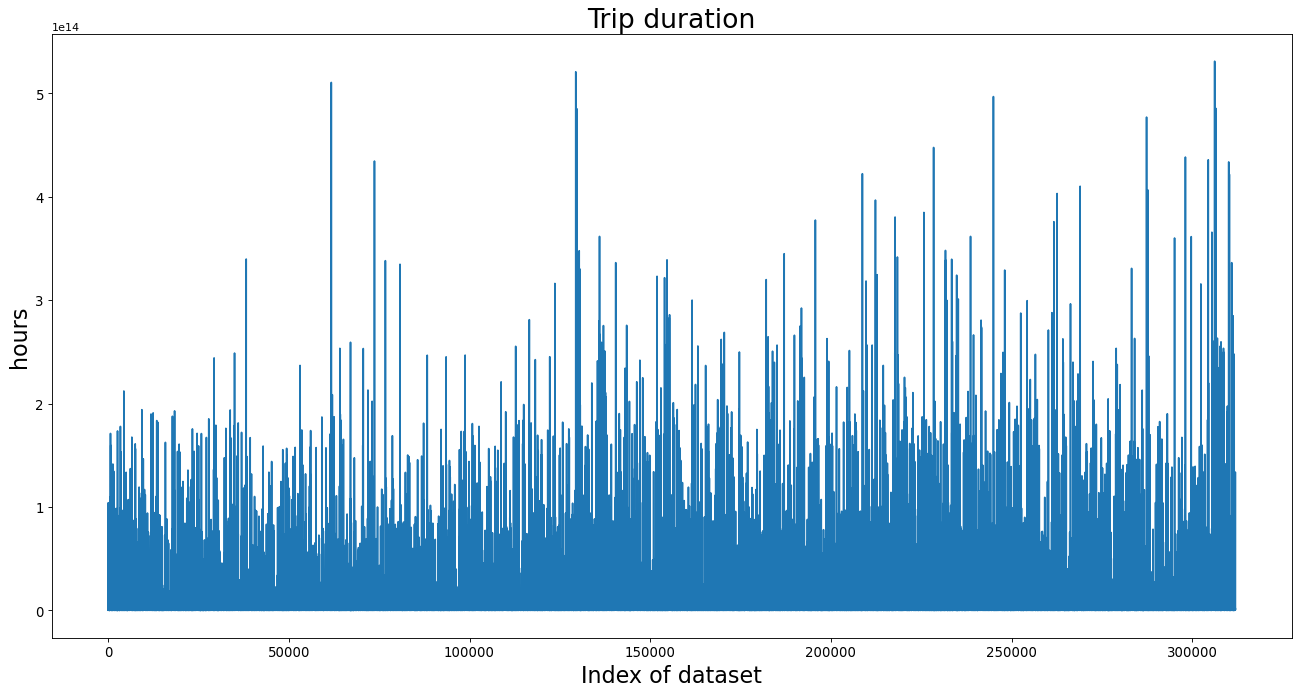

In [15]:
#plot trip duration
fig,ax = plt.subplots(figsize=(20,10), dpi= 80) 
axis_font = {'size':'20'}
label_font = {'labelsize':'12'}
dic={'fontsize': '24'}

ax.plot(df_LA['trip_duration'], color = 'tab:blue')
ax.set_title("Trip duration", dic)
ax.set_ylabel('hours',**axis_font)
ax.set_xlabel('Index of dataset',**axis_font)
ax.tick_params(axis='both', **label_font)
plt.show()

**Export**

In [16]:
df_LA.to_csv(r'../data/LA.csv', index = False)
df_LA

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,trip_duration
0,2018-01-01 00:04:00,2018-01-01 00:25:00,3063,3018,5889,Walk-up,Pershing Square,Grand & Olympic,0 days 00:21:00
1,2018-01-01 00:05:00,2018-01-01 00:25:00,3063,3018,6311,Walk-up,Pershing Square,Grand & Olympic,0 days 00:20:00
2,2018-01-01 00:06:00,2018-01-01 00:25:00,3063,3018,5753,Walk-up,Pershing Square,Grand & Olympic,0 days 00:19:00
3,2018-01-01 00:13:00,2018-01-01 00:35:00,3018,3031,6220,Monthly Pass,Grand & Olympic,7th & Spring,0 days 00:22:00
4,2018-01-01 00:14:00,2018-01-01 00:59:00,4204,4216,12436,Monthly Pass,Washington & Abbot Kinney,17th St / SMC E Line Station,0 days 00:45:00
...,...,...,...,...,...,...,...,...,...
311889,2018-12-31 23:46:00,2018-12-31 23:55:00,3069,3069,6222,Walk-up,Broadway & 3rd,Broadway & 3rd,0 days 00:09:00
311890,2018-12-31 23:47:00,2018-12-31 23:54:00,3069,3069,5730,Walk-up,Broadway & 3rd,Broadway & 3rd,0 days 00:07:00
311891,2018-12-31 23:51:00,2019-01-01 01:28:00,4211,4210,12347,Walk-up,Pacific & North Venice,Ocean Front Walk & North Venice,0 days 01:37:00
311892,2018-12-31 23:54:00,2019-01-01 00:22:00,3005,3082,12128,Walk-up,7th & Flower,Traction & Rose,0 days 00:28:00
